In [1]:
import pandas as pd
import json
import os
import math
import numpy as np
import librosa, librosa.display

## READ DATASET

In [2]:
df = pd.read_csv("C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/Data/features_3_sec.csv")
df.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,blues.00000.5.wav,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,blues.00000.6.wav,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,blues.00000.7.wav,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,blues.00000.8.wav,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,blues.00000.9.wav,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


## ABOUT DATASET

In [3]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (9990, 60)
Count of Positive and Negative samples


,index,label
0,blues,1000
1,jazz,1000
2,metal,1000
3,pop,1000
4,reggae,1000
5,disco,999
6,classical,998
7,hiphop,998
8,rock,998
9,country,997


In [4]:
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


In [5]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [6]:
df = df.drop(labels="filename", axis=1)

In [7]:
df.head(10)

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,4371.985614,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,4325.026668,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,3625.280386,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,3586.934721,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,3505.522649,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


## DATA VISUALIZATION

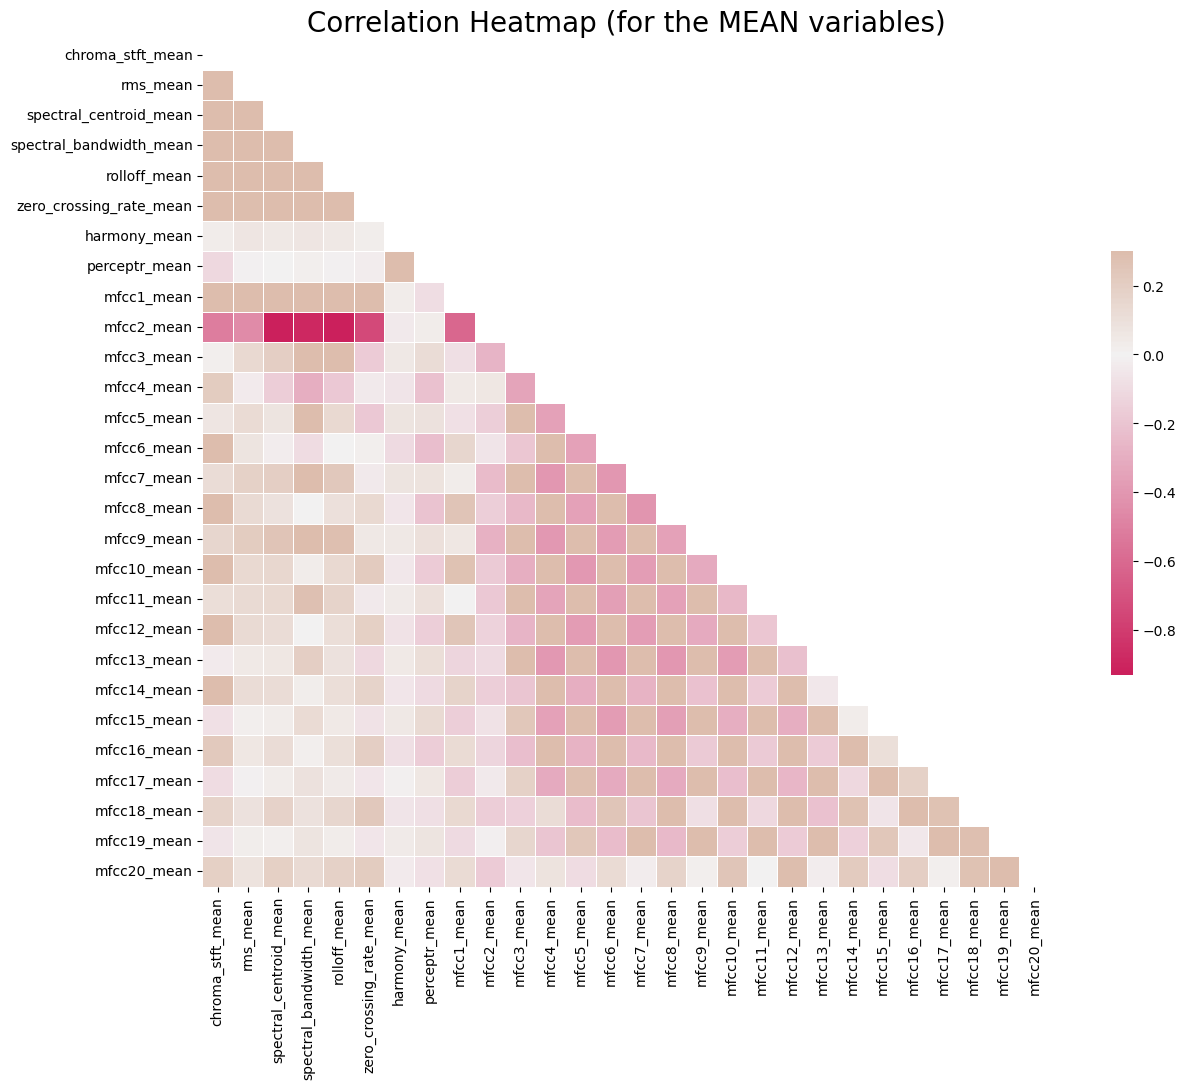

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(16, 11));

cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

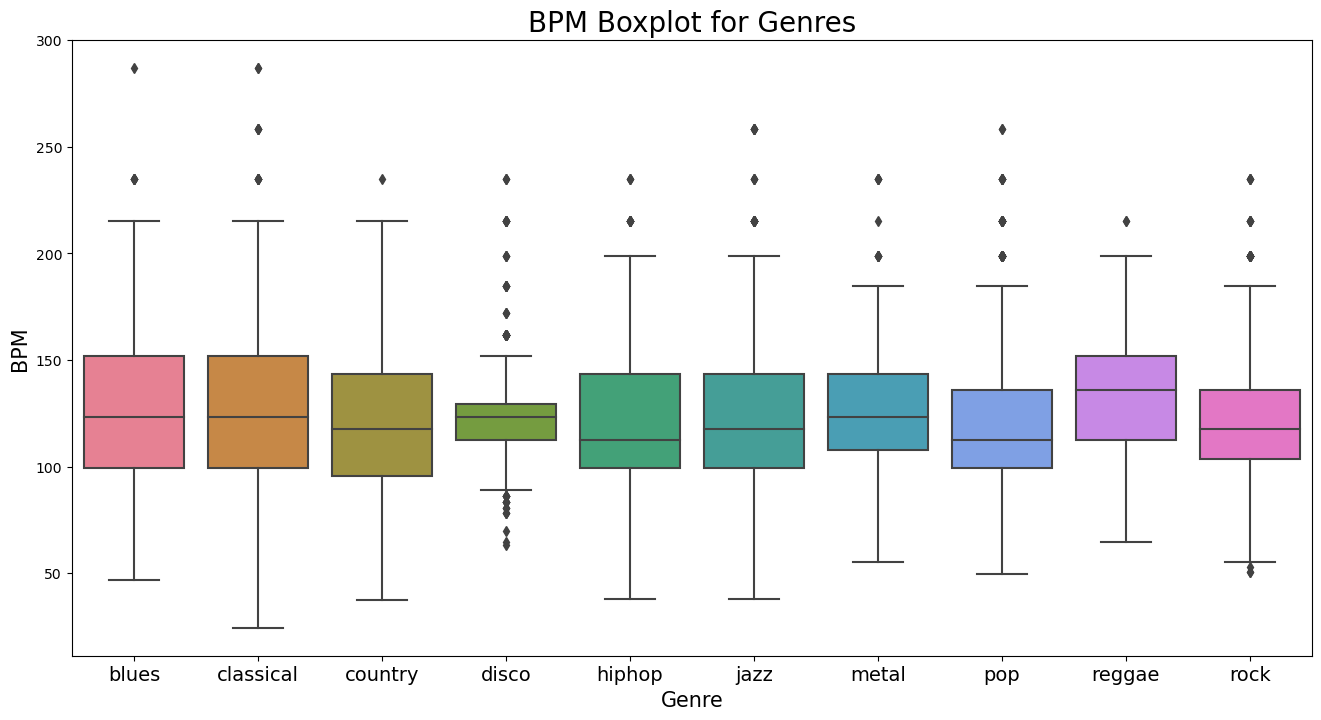

In [9]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

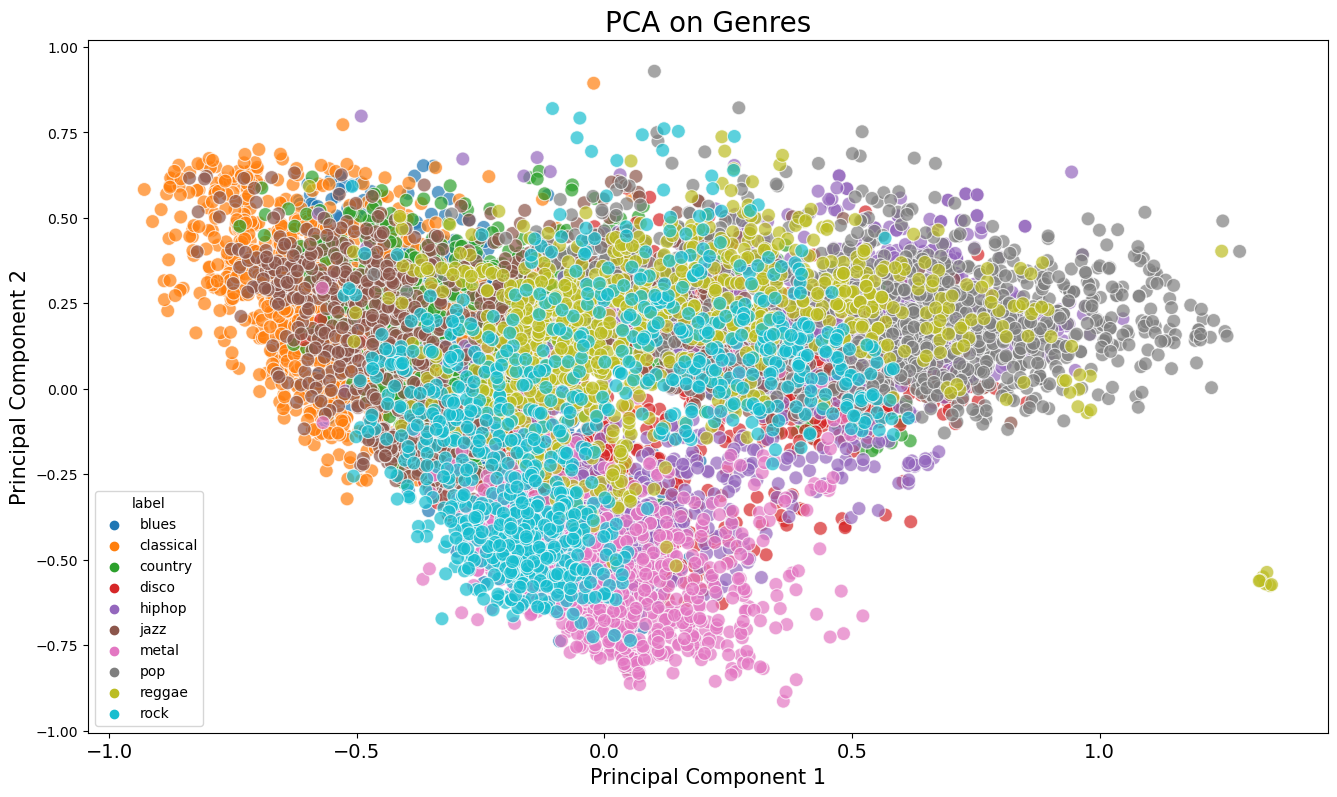

In [10]:
import sklearn.preprocessing as skp
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

## BUILDING MODEL

In [11]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import random
import math

In [12]:
DATASET_PATH = "C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/Data/genres_original"
JSON_PATH = "C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [13]:
SAMPLE_RATE = 22050
SAMPLES_PER_TRACK = SAMPLE_RATE * 30 

def augment_audio(signal, sr):
    
    stretch_factor = np.random.uniform(0.8, 1.2)
    signal = librosa.effects.time_stretch(signal, stretch_factor)
    pitch_shift = np.random.randint(-2, 3)
    signal = librosa.effects.pitch_shift(signal, sr, pitch_shift)
    noise = np.random.randn(len(signal)) * 0.005
    signal = signal + noise
    signal = signal * np.random.uniform(0.8, 1.2)
    return signal

def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5, augment=False):
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))
            for f in filenames:

                file_path = os.path.join(dirpath, f)
                if file_path != '/content/drive/MyDrive/Music Genre/Data/genres_original/jazz/jazz.00054.wav':
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                    if augment and np.random.rand() < 0.5:
                        signal = augment_audio(signal, sample_rate)
                    for d in range(num_segments):

                        start = samples_per_segment * d
                        finish = start + samples_per_segment
                        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i - 1)
                            print("{}, segment:{}".format(file_path, d+1))
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


In [14]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: genres_original\blues
C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/Data/genres_original\blues\blues.00000.wav, segment:1
C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/Data/genres_original\blues\blues.00000.wav, segment:2
C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/Data/genres_original\blues\blues.00000.wav, segment:3
C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/Data/genres_original\blues\blues.00000.wav, segment:4
C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/Data/genres_original\blues\blues.00000.wav, segment:5
C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/Data/genres_original\blues\blues.00000.wav, segment:6
C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/Data/genres_original\blues\blues.00000.wav, segment:7
C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/Data/genres_original\blues\blues.00000.wav, segment:8
C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/Data/genres_original\blues\blues.00000.wav, segment:9
C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/Data/genres_origina

In [15]:
DATA_PATH ="C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/data_10.json"

In [16]:
import os

if not os.path.exists(DATA_PATH):
    print(f"File does not exist: {DATA_PATH}")
else:
    print(f"File exists: {DATA_PATH}, Size: {os.path.getsize(DATA_PATH)} bytes")


File exists: C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/data_10.json, Size: 661806119 bytes


In [17]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [18]:
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [19]:
X.shape

(9986, 130, 13)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [21]:
X_train.shape

(7489, 130, 13, 1)

In [22]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
input_shape

(130, 13, 1)

In [23]:
from keras.regularizers import l2

model_cnn = keras.Sequential()

model_cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

model_cnn.add(keras.layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.0001)))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Dropout(0.3))

model_cnn.add(keras.layers.Conv2D(256, (2, 2), activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.0001)))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Dropout(0.3))


model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(128, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.0001)))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Dropout(0.3))

model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [24]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
             EarlyStopping(patience=3)
]

In [26]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 6, 64)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 64, 6, 64)         256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 128)        73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 2, 128)        0         
 g2D)                                                            
                                                        

In [27]:
history = model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100,callbacks=callbacks)

Epoch 1/100


235/235 [==============================] - 13s 46ms/step - loss: 2.1538 - accuracy: 0.3564 - val_loss: 1.4517 - val_accuracy: 0.5274
Epoch 2/100
235/235 [==============================] - 11s 46ms/step - loss: 1.5947 - accuracy: 0.4898 - val_loss: 1.2443 - val_accuracy: 0.5927
Epoch 3/100
235/235 [==============================] - 11s 45ms/step - loss: 1.4090 - accuracy: 0.5512 - val_loss: 1.1688 - val_accuracy: 0.6139
Epoch 4/100
235/235 [==============================] - 10s 45ms/step - loss: 1.2720 - accuracy: 0.5929 - val_loss: 1.0654 - val_accuracy: 0.6620
Epoch 5/100
235/235 [==============================] - 11s 45ms/step - loss: 1.1806 - accuracy: 0.6261 - val_loss: 1.0579 - val_accuracy: 0.6672
Epoch 6/100
235/235 [==============================] - 11s 45ms/step - loss: 1.0924 - accuracy: 0.6548 - val_loss: 1.0018 - val_accuracy: 0.6836
Epoch 7/100
235/235 [==============================] - 11s 45ms/step - loss: 1.0400 - accuracy: 0.6668 - val_loss: 1.0037 - val_

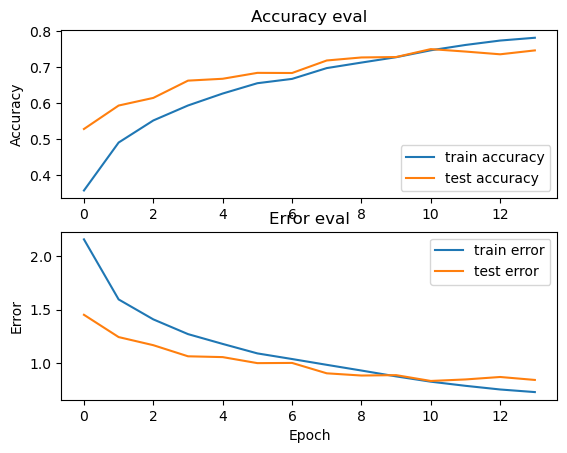

In [28]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()



plot_history(history)

In [29]:
import pandas as pd
metrics_df = pd.DataFrame(history.history)
metrics_df.tail(10)

,loss,accuracy,val_loss,val_accuracy
4,1.180596,0.626118,1.057865,0.667201
5,1.092373,0.654827,1.001797,0.683620
6,1.039983,0.666845,1.003721,0.683220
7,0.986018,0.696889,0.907042,0.718062
8,0.932932,0.712245,0.886386,0.726472
9,0.878448,0.727200,0.889997,0.727673
10,0.829115,0.746428,0.835898,0.749700
11,0.790653,0.761250,0.849988,0.742891
12,0.756484,0.773535,0.872847,0.735282
13,0.732298,0.781279,0.845343,0.746095


In [30]:
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 1s - loss: 0.8453 - accuracy: 0.7461 - 971ms/epoch - 12ms/step

Test accuracy: 0.7460952997207642


In [31]:
model_cnn.save("MusicGenre_CNN.h5", save_format='h5' )

C:\Users\PRAVEEN MOHAN DAYAL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
new_model = keras.models.load_model("MusicGenre_CNN.h5")
new_model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
new_model.evaluate(X_test,y_test,batch_size=128)

20/20 [==============================] - 1s 41ms/step - loss: 0.8453 - accuracy: 0.7461


[0.8453426361083984, 0.7460952997207642]

## TESTING ON TEST DATASET

In [33]:
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [34]:
X_to_predict.shape

(130, 13, 1)

In [35]:
X_to_predict = X_to_predict[np.newaxis, ...]

In [36]:
X_to_predict.shape

(1, 130, 13, 1)

In [37]:
prediction = model_cnn.predict(X_to_predict)

1/1 [==============================] - 0s 155ms/step


In [38]:
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 8


## ALL IN ONE

In [39]:
X_to_predict = X_test[25]
y_to_predict = y_test[25]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 4
1/1 [==============================] - 0s 31ms/step
Predicted Genre: 4


## MULTI-TESTING ON TEST DATASET

In [40]:
import random
for n in range(10):

  i = random.randint(0,len(X_test))
  
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 7
1/1 [==============================] - 0s 33ms/step
Predicted Genre: 7

Real Genre: 5
1/1 [==============================] - 0s 33ms/step
Predicted Genre: 9

Real Genre: 0
1/1 [==============================] - 0s 36ms/step
Predicted Genre: 0

Real Genre: 8
1/1 [==============================] - 0s 36ms/step
Predicted Genre: 8

Real Genre: 4
1/1 [==============================] - 0s 34ms/step
Predicted Genre: 8

Real Genre: 6
1/1 [==============================] - 0s 38ms/step
Predicted Genre: 6

Real Genre: 7
1/1 [==============================] - 0s 30ms/step
Predicted Genre: 3

Real Genre: 8
1/1 [==============================] - 0s 33ms/step
Predicted Genre: 8

Real Genre: 3
1/1 [==============================] - 0s 38ms/step
Predicted Genre: 3

Real Genre: 8
1/1 [==============================] - 0s 35ms/step
Predicted Genre: 8


## TESTING WITH EXTERNAL DATA

In [41]:
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration 
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS =10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):
    start = samples_per_segment * d
    finish = start + samples_per_segment
    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [42]:
genre_dict = {0:"disco ",1:"pop",2:"classical",3:"metal",4:"rock",5:"blues",6:"hiphop",7:"reggae",8:"country",9:"jazz"}

In [43]:
new_input_mfcc = process_input("C:/Users/PRAVEEN MOHAN DAYAL/OneDrive/Desktop/Data/genres_original/country/country.00010.wav", 30)

In [44]:
type(new_input_mfcc)

numpy.ndarray

In [45]:
new_input_mfcc.shape

(130, 13)

In [46]:
new_input_mfcc.shape

(130, 13)

In [47]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [48]:
prediction = model_cnn.predict(X_to_predict)

predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

1/1 [==============================] - 0s 37ms/step
Predicted Genre: country


### CNN+ATTENTION

In [49]:
from keras import layers, Model
from keras.regularizers import l2
import tensorflow as tf

inputs = layers.Input(shape=input_shape)


x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001))(x)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, (2, 2), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001))(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

attention_scores = layers.Conv2D(1, (1, 1), activation='sigmoid')(x) 
x = layers.Multiply()([x, attention_scores]) 
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_cnn_attention = Model(inputs, outputs)
model_cnn_attention.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn_attention.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 130, 13, 1)]         0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 128, 11, 32)          320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 64, 6, 32)            0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                                  
 batch_normalization_4 (Bat  (None, 64, 6, 32)            128       ['max_pooling2d_3[0][0]'] 

In [50]:
history1 = model_cnn_attention.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=40)

Epoch 1/40
235/235 [==============================] - 7s 22ms/step - loss: 2.2491 - accuracy: 0.2978 - val_loss: 1.7013 - val_accuracy: 0.4958
Epoch 2/40
235/235 [==============================] - 5s 20ms/step - loss: 1.7327 - accuracy: 0.4341 - val_loss: 1.3762 - val_accuracy: 0.5483
Epoch 3/40
235/235 [==============================] - 5s 20ms/step - loss: 1.5332 - accuracy: 0.5002 - val_loss: 1.2455 - val_accuracy: 0.5927
Epoch 4/40
235/235 [==============================] - 5s 20ms/step - loss: 1.4089 - accuracy: 0.5353 - val_loss: 1.1219 - val_accuracy: 0.6368
Epoch 5/40
235/235 [==============================] - 5s 20ms/step - loss: 1.3499 - accuracy: 0.5559 - val_loss: 1.0683 - val_accuracy: 0.6572
Epoch 6/40
235/235 [==============================] - 5s 20ms/step - loss: 1.2787 - accuracy: 0.5744 - val_loss: 1.0253 - val_accuracy: 0.6700
Epoch 7/40
235/235 [==============================] - 5s 20ms/step - loss: 1.2241 - accuracy: 0.5910 - val_loss: 0.9906 - val_accuracy: 0.6912

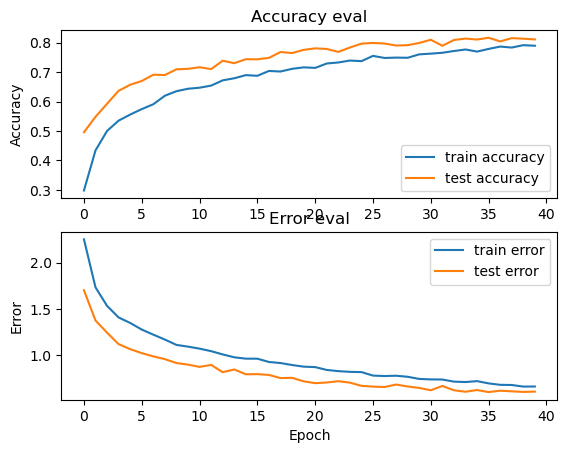

In [51]:
plot_history(history1)

In [52]:
test_loss, test_acc = model_cnn_attention.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 1s - loss: 0.6115 - accuracy: 0.8114 - 573ms/epoch - 7ms/step

Test accuracy: 0.8113736510276794


In [53]:
model_cnn_attention.save("PredictGenre_CNN.h5", save_format='h5' )

In [54]:
prediction = model_cnn_attention.predict(X_to_predict)
predicted_index = np.argmax(prediction, axis=1)
print("Predicted Genre:", genre_dict[int(predicted_index)])

1/1 [==============================] - 0s 149ms/step
Predicted Genre: classical


In [55]:
import random
for n in range(10):

  i = random.randint(0,len(X_test))
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn_attention.predict(X_to_predict)
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 1
1/1 [==============================] - 0s 32ms/step
Predicted Genre: 1

Real Genre: 5
1/1 [==============================] - 0s 30ms/step
Predicted Genre: 5

Real Genre: 6
1/1 [==============================] - 0s 30ms/step
Predicted Genre: 6

Real Genre: 5
1/1 [==============================] - 0s 31ms/step
Predicted Genre: 5

Real Genre: 7
1/1 [==============================] - 0s 32ms/step
Predicted Genre: 7

Real Genre: 2
1/1 [==============================] - 0s 32ms/step
Predicted Genre: 2

Real Genre: 9
1/1 [==============================] - 0s 27ms/step
Predicted Genre: 9

Real Genre: 4
1/1 [==============================] - 0s 28ms/step
Predicted Genre: 4

Real Genre: 9
1/1 [==============================] - 0s 29ms/step
Predicted Genre: 9

Real Genre: 7
1/1 [==============================] - 0s 32ms/step
Predicted Genre: 3


In [56]:
genre_labels = ["classical", "jazz", "country", "pop", "rock", "metal", "disco", "hiphop", "reggae", "blues"]

### LSTM

In [61]:
tf.keras.backend.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

model_lstm = Sequential()

model_lstm.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(130, 13)))
model_lstm.add(Dropout(0.3))
model_lstm.add(Bidirectional(LSTM(128, return_sequences=False)))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(10, activation='softmax'))

model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_lstm.summary()



lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
batch_size = 32
history3=model_lstm.fit(
    X_train, y_train, 
    batch_size=batch_size,
    epochs=40,
    validation_data=(X_test, y_test),
    callbacks=[lr_reduction]
)
model_lstm.save('MusicGenre_LSTM_Enhanced.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 130, 128)          39936     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 130, 128)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               263168    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [62]:
test_loss, test_acc = model_lstm.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 4s - loss: 0.8274 - accuracy: 0.8398 - 4s/epoch - 49ms/step

Test accuracy: 0.8398077487945557


In [63]:
import random
for n in range(10):

  i = random.randint(0,len(X_test))
  
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_lstm.predict(X_to_predict)

  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 4
1/1 [==============================] - 2s 2s/step
Predicted Genre: 6

Real Genre: 9
1/1 [==============================] - 0s 43ms/step
Predicted Genre: 9

Real Genre: 2
1/1 [==============================] - 0s 42ms/step
Predicted Genre: 2

Real Genre: 1
1/1 [==============================] - 0s 41ms/step
Predicted Genre: 1

Real Genre: 4
1/1 [==============================] - 0s 42ms/step
Predicted Genre: 4

Real Genre: 7
1/1 [==============================] - 0s 45ms/step
Predicted Genre: 3

Real Genre: 6
1/1 [==============================] - 0s 42ms/step
Predicted Genre: 6

Real Genre: 6
1/1 [==============================] - 0s 43ms/step
Predicted Genre: 6

Real Genre: 7
1/1 [==============================] - 0s 45ms/step
Predicted Genre: 7

Real Genre: 5
1/1 [==============================] - 0s 41ms/step
Predicted Genre: 5


In [64]:
prediction = model_lstm.predict(X_to_predict)
predicted_index = np.argmax(prediction, axis=1)
print("Predicted Genre:", genre_dict[int(predicted_index)])

1/1 [==============================] - 0s 53ms/step
Predicted Genre: blues


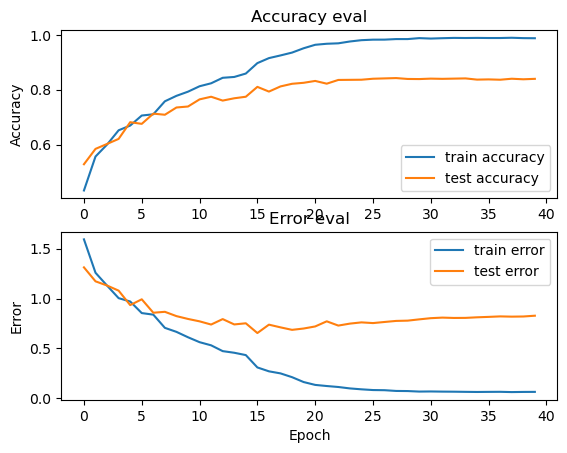

In [65]:
plot_history(history3)